In [1]:
import sys
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import clear_output
%matplotlib inline
sys.path.append('..')
import lib

In [2]:
rho = np.array([[1., 0.], [0., 0.]]) # target state
dim = rho.shape[0]

projectors_cnt = 10
measurements_cnt = 100

train_size = projectors_cnt * measurements_cnt
train_X, train_y = lib.generate_dataset(rho, projectors_cnt, measurements_cnt)
train_y = train_y.astype('float64')

In [3]:
x_ph = tf.placeholder(dtype=tf.complex64, shape=[None, dim, dim])
y_ph = tf.placeholder(dtype=tf.float32, shape=[None])

model = lib.BaselineModel(x_ph, y_ph)

W0904 09:44:47.596507 140315968067328 deprecation.py:323] From /mnt/spopov/miniconda3/envs/py36/lib/python3.6/site-packages/tensorflow/python/ops/losses/losses_impl.py:121: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [4]:
epoches = int(5e3)
eps = 1e-7
loss_history = []
metrics_history = []
measurements_rho = np.array([lib.simulator.bornRule(x, rho) for x in train_X])

sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

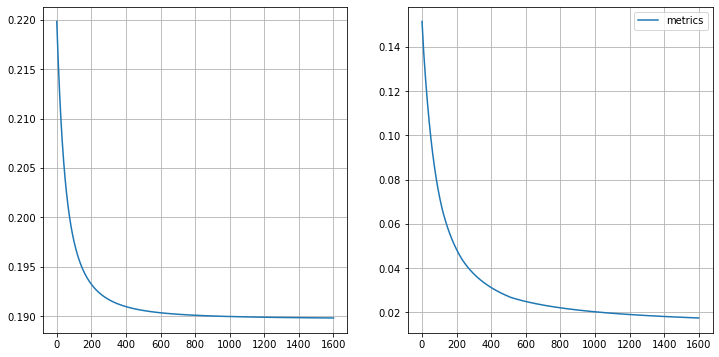

Epoch: 1600, Loss: 0.1897960901260376, Metrics: 0.017377058183300147


In [5]:
for t in range(epoches):
    loss_t, _ = sess.run([model.loss, model.optimize], {x_ph: train_X, y_ph: train_y})
    loss_history.append(loss_t)
    
    sigma = sess.run(model.sigma)
    measurements_sigma = np.array([lib.simulator.bornRule(x, sigma) for x in train_X])
    
    diff = abs(measurements_sigma - measurements_rho)
    metrics_history.append(diff.mean())
    
    if t > 0 and abs(loss_history[-1] - loss_history[-2]) < eps:
        break
    
    if t % 50 == 0:
        clear_output(True)
        plt.figure(figsize=[12, 6])
        plt.subplot(1, 2, 1)
        plt.plot(loss_history)
        plt.grid()
        plt.subplot(1, 2, 2)
        plt.plot(metrics_history, label='metrics')
        plt.legend()
        plt.grid()
        plt.show()
        print(f'Epoch: {t}, Loss: {loss_t}, Metrics: {diff.mean()}')

In [6]:
sigma = sess.run(model.sigma)
sigma

array([[ 0.9811514 +3.1643918e-10j, -0.02716913+2.6840714e-03j],
       [-0.02716913-2.6840693e-03j,  0.01884858-3.1643976e-10j]],
      dtype=complex64)

In [7]:
lib.fidelity(rho, sigma)

0.9811514019966125